# Goal
Look at distance off the tee since 1980 through 2020 current tournaments. The hypothesis is that the introduction of the modern ball, namely Titleist's Pro-V1 caused an upswing in distance. While it is common knowledge that the Pro-V1 and its copies by competitors caused the longest hitters to gain extra length, little is known how it affected the shorter hitters.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 10)})
sns.set_context("poster", rc={"lines.linewidth": 5})

In [2]:
!pwd

/Users/nicholasbeaudoin/Desktop/Projects/PGA-Tour-Scraper/notebooks


## Import scraped data based on Shotlink

The following data comes from the PGA Tour's public facing website. Using Python to scrape the data through the html code provides a unique glimpse into how the PGA Tour derives their data from Shotlink. Since Shotlink no longer authorizes or allows academic usage of their data, it has become more challenging for researchers of the game to inquire to pressing questions at the top of the game. My hope is that the following analysis helps contribute to a more analytical narrative of golf's top performers.

In all, 2,022 PGA Tour players were analyzed. 

In [3]:
df = pd.read_csv('../data/Off the tee_Driving Distance.csv')

In [4]:
df.head()

,Unnamed: 0,PLAYER NAME,ROUNDS,AVG.,TOTAL DISTANCE,TOTAL DRIVES,YEAR,Tournament
0,0,Dan Pohl,4,282.6,"2,261",8,1980,Pensacola Open
1,1,Stanton Altgelt,4,280.1,"2,241",8,1980,Pensacola Open
2,2,Gary Hallberg,4,276.9,"2,215",8,1980,Pensacola Open
3,3,Dave Eichelberger,4,275.4,"2,203",8,1980,Pensacola Open
4,4,George Cadle,4,275.3,"2,202",8,1980,Pensacola Open


In [5]:
len(df)

115014

## Data janitor work

In [6]:
# Drop first column
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [7]:
df.head()

,PLAYER NAME,ROUNDS,AVG.,TOTAL DISTANCE,TOTAL DRIVES,YEAR,Tournament
0,Dan Pohl,4,282.6,"2,261",8,1980,Pensacola Open
1,Stanton Altgelt,4,280.1,"2,241",8,1980,Pensacola Open
2,Gary Hallberg,4,276.9,"2,215",8,1980,Pensacola Open
3,Dave Eichelberger,4,275.4,"2,203",8,1980,Pensacola Open
4,George Cadle,4,275.3,"2,202",8,1980,Pensacola Open


## Average drives for field over season

October 11, 2000 was a day that rocked the golf world. On this day, the Pro V1 entered its first round of tournament play in Las Vegas at the Invesys Classic. The "Professional Veneer One," aka the Pro V1, was a solid core ball that displaced wound technology in place of the traditional golf ball. Immediately, tour players began to turn to the Pro V1 as their prime gamers with its distance benefits. Not wanting to be left behind the curve, Nike developed its own version of the urethane golf ball in its Nike Tour Accuracy, which Tiger Woods immediately put into rotation. Over the early 2000s, it is said that distance gains were dramatic. But just how much did distance increase during this time period and were there players that saw a more dramatic increase in distance than others?

When looking at the average driving distance ofrom 1980 through February, 2020, it is obvious that the mean distance has increased. In fact, since the introduction of the Pro V1, mean distance on tour has increased by 18.17 yards. 

In [8]:
# How many players in dataset?
len(df['PLAYER NAME'].unique())

2202

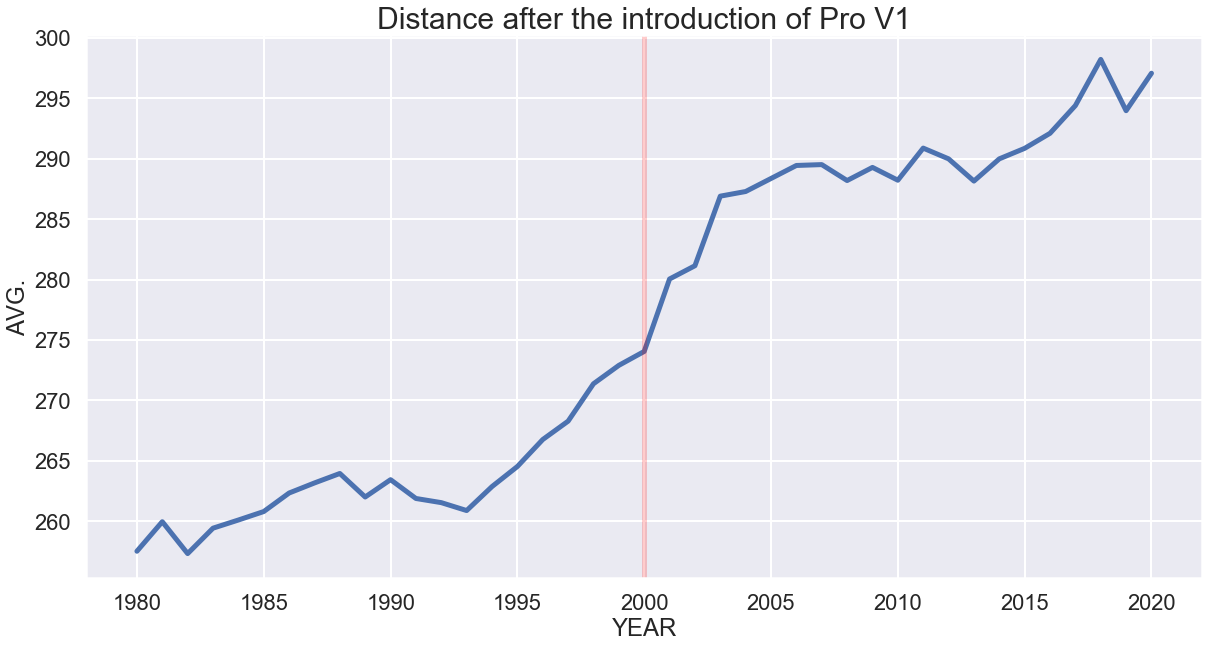

In [25]:
year_avg_df = df.groupby('YEAR', as_index=False)['AVG.'].mean()
        
sns.lineplot(data=year_avg_df, x='YEAR', y='AVG.')
plt.title('Distance after the introduction of Pro V1', size=30)
plt.axvline(2000, color='red', alpha=0.2)

In [10]:
year_avg_df[year_avg_df['YEAR'] > 2000]['AVG.'].max() - year_avg_df[year_avg_df['YEAR'] > 2000]['AVG.'].min()

18.16993981881609

## Which year saw the biggest spike in driving distance?

When looking at the difference of year-over-year change after the introduction of the Pro v1, we see a phenominal spike in distance. 2000 and 2002 saw the biggest jump in distance off the tee. But this is on average, and to really paint the picture of how much the new urethane ball influenced the tour, looking the top 10% of driving distance versus the lower 10% of distance off the tee is imperative.

In [11]:
tour_avg_df = df.groupby('YEAR', as_index=False)['AVG.'].mean()

tour_avg_df['Diff'] = tour_avg_df['AVG.'] - tour_avg_df['AVG.'].shift(1)

tour_avg_df.head()

,YEAR,AVG.,Diff
0,1980,257.520734,NaN
1,1981,259.963758,2.443024
2,1982,257.325528,-2.638230
3,1983,259.428708,2.103180
4,1984,260.103681,0.674972


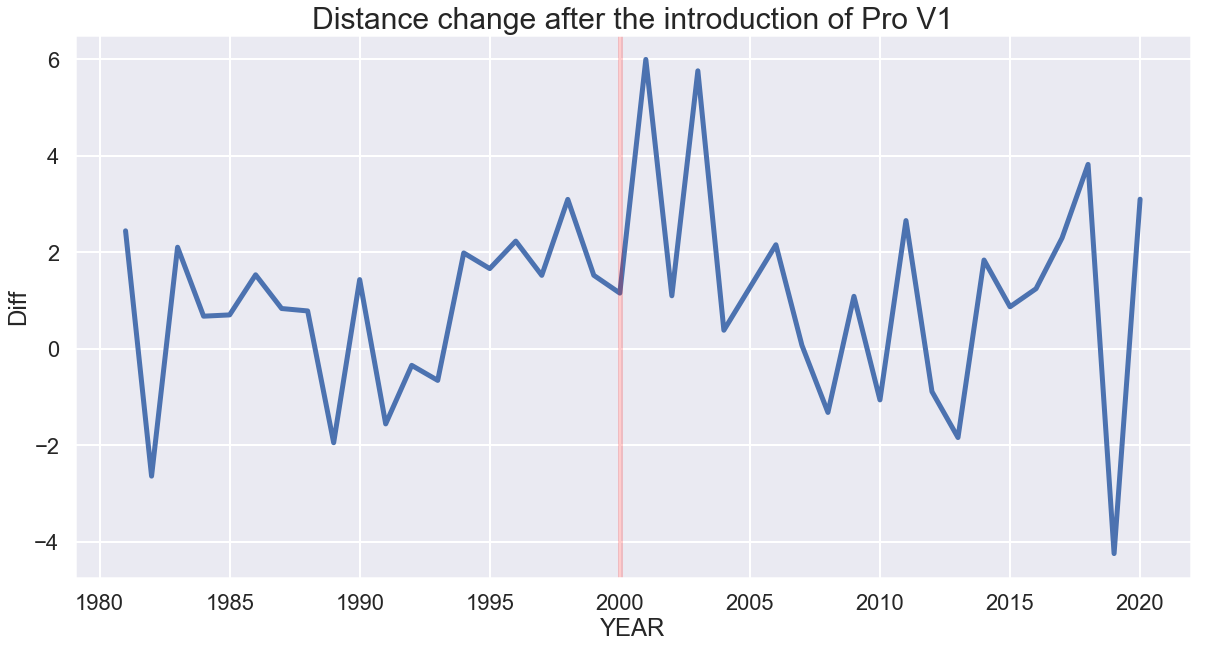

In [26]:
sns.lineplot('YEAR', 'Diff', data=tour_avg_df)
plt.title('Distance change after the introduction of Pro V1', size=30)
plt.axvline(2000, color='red', alpha=0.2)

## What does the distribution between pre-Pro V1 and post Pro V1 look like?

In [13]:
df.head()

,PLAYER NAME,ROUNDS,AVG.,TOTAL DISTANCE,TOTAL DRIVES,YEAR,Tournament
0,Dan Pohl,4,282.6,"2,261",8,1980,Pensacola Open
1,Stanton Altgelt,4,280.1,"2,241",8,1980,Pensacola Open
2,Gary Hallberg,4,276.9,"2,215",8,1980,Pensacola Open
3,Dave Eichelberger,4,275.4,"2,203",8,1980,Pensacola Open
4,George Cadle,4,275.3,"2,202",8,1980,Pensacola Open


To gain a deeper look at the splike in driving distance, we took a peak at the distribution of driving distance between 1999 and 2003. The assumption is that since the Pro V1 was introduced in late 2000, competing ball manufactures adopted the urethane cover and proceeded to have their Tour players game the same technology. This time four year time span gives the data robustness to cover any technology adoption between Tour members and should show a statistically significant difference due to its large sample size.

Text(0.5, 1.0, 'Distance difference between 1999 and 2003')

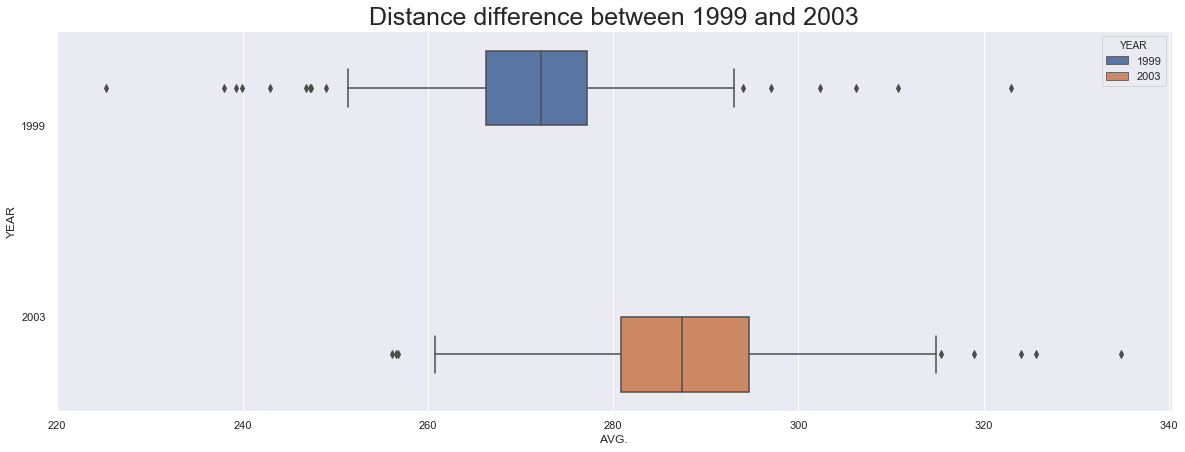

In [49]:
sns.set(rc={'figure.figsize':(20, 7)})

df_99_03 = df[(df['YEAR'] == 1999) | (df['YEAR'] == 2003)].groupby(['PLAYER NAME', 'YEAR'], as_index=False).mean()

sns.boxplot(x="AVG.", y="YEAR", hue="YEAR", data=df_99_03, orient='h')
plt.title('Distance difference between 1999 and 2003', size=25)


In [15]:
# 1999

from numpy import percentile


data = df_99_03[df_99_03['YEAR'] == 1999]['AVG.']

# calculate quartiles
quartiles = percentile(data, [25, 50, 75])

# calculate min/max
data_min, data_max = data.min(), data.max()

# print 5-number summary
print('1999 PGA Tour Season')
print('')
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

1999 PGA Tour Season

Min: 225.300
Q1: 266.303
Median: 272.254
Q3: 277.180
Max: 322.900


In [16]:
# 2003

data = df_99_03[df_99_03['YEAR'] == 2003]['AVG.']

# calculate quartiles
quartiles = percentile(data, [25, 50, 75])

# calculate min/max
data_min, data_max = data.min(), data.max()

# print 5-number summary
print('2003 PGA Tour Season')
print('')
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

2003 PGA Tour Season

Min: 256.100
Q1: 280.857
Median: 287.439
Q3: 294.614
Max: 334.800
